![](WAZE.jpg)
# Waze User Churn Project: Results of EDA
Waze is a free navigation app that makes it easier for drivers around the world to get to where they want to go. Waze leadership wants to optimize the company’s retention strategy, enhance user experience, and make data-driven decisions about product development. They would like an analysis of WAZE data to understand their users better and the development of a machine learning model that predicts user churn. (Churn is understood to be the number of users who have uninstalled the Waze app or stopped using it.) 

This project is part of a larger effort at Waze to increase growth. It assumes that high retention rates indicate satisfied users who repeatedly employ the Waze app over time. Identifying and predicting which users are likely to churn will allow the WAZE team to target such individuals to induce their retention, thereby allowing Waze to grow its business. 

**Data**    
Waze’s free navigation app makes it easier for drivers around the world to get to where they want to go. Waze’s community of map editors, beta testers, translators, partners, and users help make each drive better and safer. Waze partners with cities, transportation authorities, broadcasters, businesses, and first responders to help as many people as possible travel more efficiently and safely. The data set is in-house from Waze for Cities (https://www.transportation.gov/office-policy/transportation-policy/faq-waze-data).

**Deliverables**   
(Since this is an exercise, all models are predetermined.)
* I.	An analysis of WAZE data to understand their users better
* II.	The development of a machine learning model that predicts user churn
    * a.	a binomial logistic regression model
    * b.	a winning tree-based model
* Appendix: A 2 sample t-test based on a sample of user data determining if there is a statistically significant difference in the mean number of rides between iPhone® users and Android™ users

In [1]:
# Import standard operational packages
import numpy as np 
import pandas as pd

# Import visualization package
import matplotlib.pyplot as plt
import seaborn as sns

# Set Jupyter to display all of the columns (no redaction)
pd.set_option('display.max_columns', None)

In [2]:
# Import data; create df
df0 = pd.read_csv('waze_dataset.csv', on_bad_lines='skip')
df0.head()

,ID,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android


# PART I: EDA - understanding the WAZE user better
Examine data for what it does and does not say to understand the WAZE user better and investigate the data for use in machine learning models.    

Data is inspected, organized, and prepared for analysis:
- a dataframe is built for the churn dataset
- descriptive statistics are given
- a summary of columns, Dtypes, and missing values is created
- data structures are combined and modified to create meaningful variables
- plots are created to visualize variables and relationships between variables
- distribution assessments are made

In [3]:
df0.columns

Index(['ID', 'label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device'],
      dtype='object')

In [4]:
# Investigate df
df0.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   ID                       14999 non-null  int64  
 1   label                    14299 non-null  object 
 2   sessions                 14999 non-null  int64  
 3   drives                   14999 non-null  int64  
 4   total_sessions           14999 non-null  float64
 5   n_days_after_onboarding  14999 non-null  int64  
 6   total_navigations_fav1   14999 non-null  int64  
 7   total_navigations_fav2   14999 non-null  int64  
 8   driven_km_drives         14999 non-null  float64
 9   duration_minutes_drives  14999 non-null  float64
 10  activity_days            14999 non-null  int64  
 11  driving_days             14999 non-null  int64  
 12  device                   14999 non-null  object 
dtypes: float64(3), int64(8), object(2)
memory usage: 1.5+ MB


In [5]:
# Call summary of basic statistics
df0.describe()

,ID,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,7499.000000,80.633776,67.281152,189.964447,1749.837789,121.605974,29.672512,4039.340921,1860.976012,15.537102,12.179879
std,4329.982679,80.699065,65.913872,136.405128,1008.513876,148.121544,45.394651,2502.149334,1446.702288,9.004655,7.824036
min,0.000000,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,3749.500000,23.000000,20.000000,90.661156,878.000000,9.000000,0.000000,2212.600607,835.996260,8.000000,5.000000
50%,7499.000000,56.000000,48.000000,159.568115,1741.000000,71.000000,9.000000,3493.858085,1478.249859,16.000000,12.000000
75%,11248.500000,112.000000,93.000000,254.192341,2623.500000,178.000000,43.000000,5289.861262,2464.362632,23.000000,19.000000
max,14998.000000,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


#### Initial summary
The data set contains 14,999 rows where each row represents one unique user (so not too many users)

It has 12 variables (columns): label, sessions, drives, device, total_sessions, n_days_after_onboarding, total_navigations_fav1, total_navigations_fav2, driven_km_drives, duration_minutes_drives, activity_days, driving_days

- 2 categorical objects: label and device
- 8 discrete int64: ID, sessions, drives, n_days_after_onboarding, total_navigations_fav1, total_navigations_fav2, activity_days, driving_days
- 3 continuous float64: total_sessions, driven_km_drives, duration_minutes_drives

Further comments:   
* the variable `ID` is unnecessary and offers no predictive information: delete

**CATEGORICAL VARIABLES**  
`label`: binary target variable. Records if a user has churned anytime during the course of the month (retained/churned)
* will be target variable
* label is missing 700 entries - may delete these
  
`device`: binary variable recording type of device a user starts a session with: iPhone or Android
* check for statistical relevance
   * visualizations
   * 2 sample T-test

**MONTH STATISTICS**  
`activity_days`: total # of days the user opened the app during the **month**
* 0 -> 31 (month has 31 days)
* Median: 16

`driving_days`: total # of days the user drives (at least 1 km) during the **month**
* 0 -> 30 
* Median: 12
    * Curious that no user opened the app all 31 days

`sessions`: total # of occurrences of a user opening the app during the **month** (how dedicated to app they were)
* 0 -> 743 (~23x a day)
* Median: 56 (~2x a day)
    * **23x a day seems excessive** = super user or error

`drives`: total # of occurrences of a user driving at least 1 km during the **month**
* 0 -> 596 drives (~19x per day!)
* Median: 48 (~1½ x a day or 2 per day on weekdays, & 2 on the weekends)
    * **19 drives per day seems excessive too** = super user or error

`driven_km_drives`: total kilometers driven during the **month**
* 0 -> ~ 21183kms (~13162.5 miles or 424.5 miles per day)
* Median: ~ 3,494kms (~2172 miles or 70 miles per day)
  * The median aligns with opening the app 2x a day. It’s a long commute, 35 miles in each direction but no uncommon. This does align with the median driven_km_drives and with duration_minutes_drives (below).
  * The max: some drivers are driving an insane amount. **Either there is a problem or these super users are professional drivers (e.g., truckers/gig drivers).**

`duration_minutes_drives`: total duration driven in minutes during the **month**
* 0 -> ~ 15852 mins (~264 hrs or 8.5 hrs a day).
* Median: ~ 1478 mins (~25 hrs or < an hr per day)
  * The median aligns with opening the app 2x a day. It’s a long commute, 35 miles in each direction but no uncommon. This does align with the median driven_km_drives and drives.
  * The max: some drivers are driving an insane amount. **Either there is a problem or these super users are professional drivers (e.g., truckers/gig drivers).** 

**TOTAL STATISTICS**  
`total_sessions`: a model *estimate* of the **total #** of sessions since a user has onboarded
* 0 -> 1216.2
* Median: 159.6
    * check this against years since onboarded. Median seems very low.

`n_days_after_onboarding`: **total #** of days since a user signed up for the app
* 4 -> ~ 3,500 days (~9.5 years)
* Median: 1741 (~4.8 years)
 
`total_navigations_fav1`: **total #** of navigations since onboarding to the user’s favorite place 1
* 0 -> 1236 days 
* Median: 71 days
    * could be predictive of retention; regular use
  
`total_navigations_fav2`: **total #** of navigations since onboarding to the user’s favorite place 2
* 4 -> 415 days 
* Median: 9 days
    * could be predictive of retention; regular use

### Initial df Transformations
* check for duplicates
* drop ID variable
* drop observations(rows) with missing label values?
  * compare the summary statistics of observations with missing label values and those without to see if there's a discernible (significant [= non-random reason]) difference between the 2 populations.
  * this means 3 data sets:
    * df with rows with full set of observations (excluding label observations with nulls)
    * df of *only* rows with nulls in label variable
    * df with all observations (including label observations with nulls)

In [6]:
# Check for duplicates
df0.duplicated().sum()

0

No duplicates, no problem

In [7]:
# Drop ID column
df = df0.drop(['ID'], axis = 1)		# axis = 1 indicates the vertical axis(columns) which meet criteria (ID)
df.head(10)

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android
5,retained,113,103,279.544437,2637,0,0,901.238699,439.101397,15,11,iPhone
6,retained,3,2,236.725314,360,185,18,5249.172828,726.577205,28,23,iPhone
7,retained,39,35,176.072845,2999,0,0,7892.052468,2466.981741,22,20,iPhone
8,retained,57,46,183.532018,424,0,26,2651.709764,1594.342984,25,20,Android
9,churned,84,68,244.802115,2997,72,0,6043.460295,2341.838528,7,3,iPhone


In [8]:
# Isolate rows with null values
null_df = df[df['label'].isna()]

# Display summary stats of rows with null values
null_df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000,700.000000
mean,80.837143,67.798571,198.483348,1709.295714,118.717143,30.371429,3935.967029,1795.123358,15.382857,12.125714
std,79.987440,65.271926,140.561715,1005.306562,156.308140,46.306984,2443.107121,1419.242246,8.772714,7.626373
min,0.000000,0.000000,5.582648,16.000000,0.000000,0.000000,290.119811,66.588493,0.000000,0.000000
25%,23.000000,20.000000,94.056340,869.000000,4.000000,0.000000,2119.344818,779.009271,8.000000,6.000000
50%,56.000000,47.500000,177.255925,1650.500000,62.500000,10.000000,3421.156721,1414.966279,15.000000,12.000000
75%,112.250000,94.000000,266.058022,2508.750000,169.250000,43.000000,5166.097373,2443.955404,23.000000,18.000000
max,556.000000,445.000000,1076.879741,3498.000000,1096.000000,352.000000,15135.391280,9746.253023,31.000000,30.000000


In [9]:
# Isolate rows without null values
no_null_df = df[~df['label'].isna()]

# Display summary stats of rows without null values
no_null_df.describe()

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
count,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000,14299.000000
mean,80.623820,67.255822,189.547409,1751.822505,121.747395,29.638296,4044.401535,1864.199794,15.544653,12.182530
std,80.736502,65.947295,136.189764,1008.663834,147.713428,45.350890,2504.977970,1448.005047,9.016088,7.833835
min,0.000000,0.000000,0.220211,4.000000,0.000000,0.000000,60.441250,18.282082,0.000000,0.000000
25%,23.000000,20.000000,90.457733,878.500000,10.000000,0.000000,2217.319909,840.181344,8.000000,5.000000
50%,56.000000,48.000000,158.718571,1749.000000,71.000000,9.000000,3496.545617,1479.394387,16.000000,12.000000
75%,111.000000,93.000000,253.540450,2627.500000,178.000000,43.000000,5299.972162,2466.928876,23.000000,19.000000
max,743.000000,596.000000,1216.154633,3500.000000,1236.000000,415.000000,21183.401890,15851.727160,31.000000,30.000000


Result\
The summary statistics of the rows which are missing values and the rows that are not missing values show moderate differences, but nothing which would suggest a non-random reason for the differences between the populations.

#### Continue investigating full df and comparing null set with non-null sets
decide whether to delete rows with nulls or if there's a significant difference between sets

In [10]:
# Calculate count & % of iPhone users and Android users in full dataset
print(df.shape)
print(df['device'].value_counts()) # value_counts counts the # of times device appears in the 700 rows with null values
print(df['device'].value_counts(normalize = True))  

(14999, 12)
device
iPhone     9672
Android    5327
Name: count, dtype: int64
device
iPhone     0.644843
Android    0.355157
Name: proportion, dtype: float64


In [11]:
# Calculate count & % of iPhone users and Android users in null set
print(null_df.shape)
print(null_df['device'].value_counts()) 
print(null_df['device'].value_counts(normalize = True))  

(700, 12)
device
iPhone     447
Android    253
Name: count, dtype: int64
device
iPhone     0.638571
Android    0.361429
Name: proportion, dtype: float64


In [12]:
# Calculate count & % of iPhone users and Android users in non-null set
print(no_null_df.shape)
print(no_null_df['device'].value_counts())
print(no_null_df['device'].value_counts(normalize = True))  

(14299, 12)
device
iPhone     9225
Android    5074
Name: count, dtype: int64
device
iPhone     0.64515
Android    0.35485
Name: proportion, dtype: float64


Results\
All 3 data sets have % of missing values by each device consistent with their representation in the data overall. There is nothing to suggest a non-random cause of the missing data.

* iPhone   ~64/65%
* Android  ~35/36%

### Gather further statistics and visualize
* check class balances
* check for outliers

*Visualizations*
* box plots will be helpful to determine outliers and where the bulk of the data points reside in terms of drives, sessions, and all other continuous numeric variables
* histograms display the distribution of variables
* scatter plots visually plot the relationships between variables
* bar charts communicate levels and quantities. These are good for the categorical variables label and device.

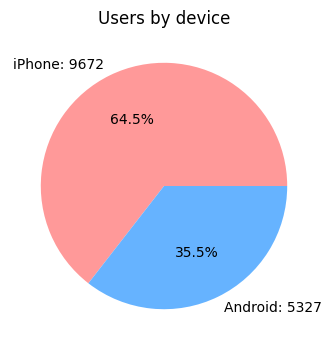

In [13]:
# Create pie chart for device category
fig = plt.figure(figsize=(4,4))
data=df['device'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',  # f string allows for embedded expressions inside curly braces 
                f'{data.index[1]}: {data.values[1]}'], # combines the index & value of the 1st element in the data
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff'] # 'autopct' parameter formats the % shown on each slice
        )                                                # %% displays a percentage sign % in the formatted string
plt.title('Users by device');

In [14]:
# Check class balance for target variable: label
print(df['label'].value_counts())
print(df['label'].value_counts(normalize = True))

label
retained    11763
churned      2536
Name: count, dtype: int64
label
retained    0.822645
churned     0.177355
Name: proportion, dtype: float64


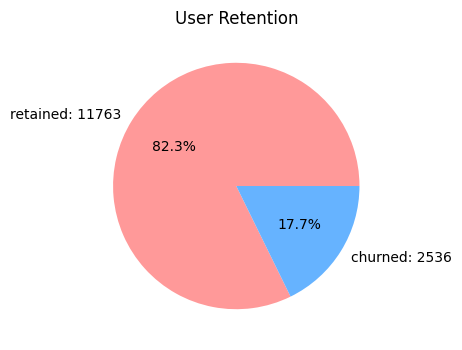

In [15]:
# Create pie chart for label category
fig = plt.figure(figsize=(4,4))
data=df['label'].value_counts()
plt.pie(data,
        labels=[f'{data.index[0]}: {data.values[0]}',
                f'{data.index[1]}: {data.values[1]}'],
        autopct='%1.1f%%', colors=['#ff9999', '#66b3ff']
        )
plt.title('User Retention');

In [16]:
# Check class balance for label by device: Android users and iPhone users
df.groupby(['label', 'device']).size() # size() counts the # of items along a given axis - here the axis is the groupby device and label

label     device 
churned   Android     891
          iPhone     1645
retained  Android    4183
          iPhone     7580
dtype: int64

In [17]:
# Check class balance for label by device: Android users and iPhone users
df.groupby('label')['device'].value_counts(normalize=True) # 'label' in parentheses because it is the col used for grouping the data 
                                                           # 'device' in brakets because it is the col used for further operations 

label     device 
churned   iPhone     0.648659
          Android    0.351341
retained  iPhone     0.644393
          Android    0.355607
Name: proportion, dtype: float64

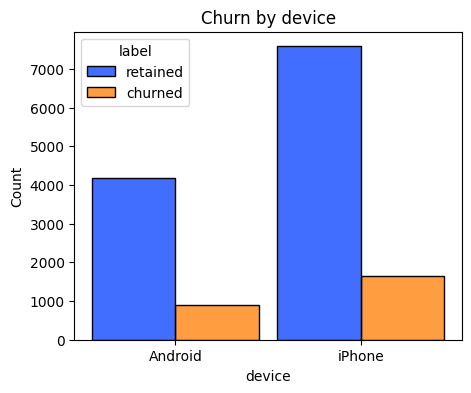

In [18]:
# Plot device-label histogram
plt.figure(figsize=(5,4))
sns.histplot(data=df,
             x='device',
             hue='label',
             palette='bright',
             multiple='dodge',
             shrink=0.9)
plt.title('Churn by device');

#### Summary of 2 categorical variables
*label*
* retained   11763 (~0.82%)
* churned     2536 (~0.18%)
  
*device*
* iPhone     9672 (~0.64%)
* Android    5327 (~0.36%)

*label by device*  
* **churned**
 * iPhone     1645 (~0.65%)
 * Android     891 (~0.35%)
* **retained**
 * iPhone     7580 (~0.64%)
 * Android    4183 (~0.35%)

The data is unbalanced with only 18% of users churning and 82% remaining   
The ratio of remaining and churning iPhone users to Android users is the same regardless of category 
* ~65% of retained users and churned users use iPhones 
* ~35% of retained users and churned users use Androids.

#### Check median statistics for differences between churned and retained users
(Median is used over average in order to prevent outliers from weighting the center)

In [19]:
# Calculate median values of all columns for churned and retained users (groupby)
df.groupby('label').median(numeric_only=True) # numeric_only=True to only consider the numeric values present in the data & not throw up an erro

,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days
label,,,,,,,,,,
churned,59.0,50.0,164.339042,1321.0,84.5,11.0,3652.655666,1607.183785,8.0,6.0
retained,56.0,47.0,157.586756,1843.0,68.0,9.0,3464.684614,1458.046141,17.0,14.0


Results of medians

median of churned users to retained users:
* had almost = sessions, drives, and total_sessions
* left after 1321 days (~3.5 yrs) vs 5 yrs for retained users
* had slightly more total_navigations_fav1 and total_navigations_fav2
* had more driven_km_drives
* had more duration_minutes_drives
* had < 1/2 the activity_days of retained users (8/17)
* had < 1/2 the  driving_days of retained users (6/14)

This suggests that the users who churned used the app quite a bit during the time they had it. **The median churned user had almost the same number of total drives in 1/2 the days. Churned users also drove ~200 kms more and for ~2.5 hours more.** These are different statistics than the super users.

### More Visualizations and feature engineering
Useful to investigate users' habits, examine outliers, and provide vizzes for stockholders

#### Days since onboarding

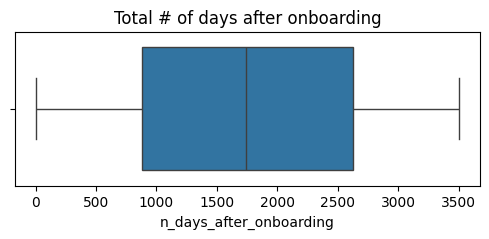

In [20]:
# Box plot for n_days_after_onboarding (total # of days since a user signed up for the app)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['n_days_after_onboarding'])
plt.title('Total # of days after onboarding');

In [21]:
# Create function to plot histograms
def histogrammer(column_str, median_text=True, **kwargs):    # **kwargs = any keyword arguments
    
    median=round(df[column_str].median(), 1)                 # Round decimal point
    plt.figure(figsize=(6,2))
    ax = sns.histplot(x=df[column_str], **kwargs)            # Plot the histogram
    
    plt.axvline(median, color='red', linestyle='--')         # Plot the median line and style
    
    if median_text==True:                                    # True: add median text 
        ax.text(0.25, 0.85, f'median={median}', color='red', # f string allows for embedded expressions inside curly braces 
            ha='left', va='top', transform=ax.transAxes)
    else:
        print('Median:', median)
    
    plt.title(f'{column_str} histogram');

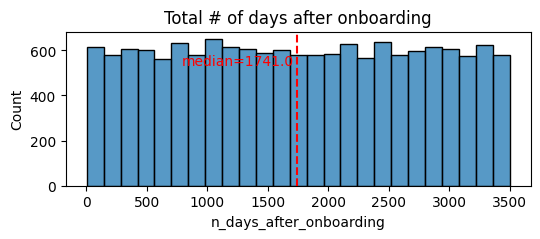

In [22]:
# Histogram for n_days_after_onboarding (total # of days since a user signed up for the app)
histogrammer('n_days_after_onboarding')
plt.title('Total # of days after onboarding');

These plots show a uniform distribution in the number of days since a user on boarded; roughly 600 users for any given length of time.   
The median number of days since a user onboarded is 1741 (~ 4.8 years). The longest a user has been on the app is ~ 3,500 days (~9.5 years).

#### USE OF APP FOR ANY PURPOSE DURING **MONTH**

#### Activity days

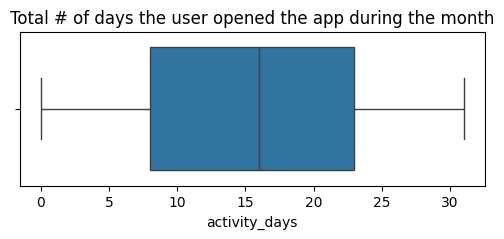

In [23]:
# Box plot for activity_days (total # of days (out of 31) the user opened the app during the month)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['activity_days'])
plt.title('Total # of days the user opened the app during the month');

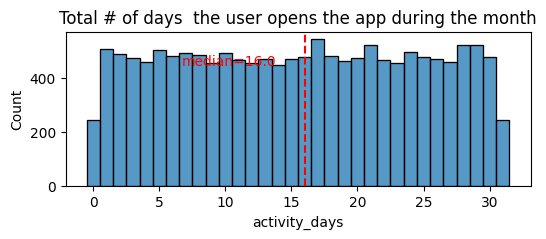

In [24]:
# Histogram for activity_days (total # of days (out of 31) the user opened the app during the month [31 max])
histogrammer('activity_days', discrete=True) # discrete=True because discrete #(31) rather than continuous (helps highlight)
plt.title('Total # of days  the user opens the app during the month');

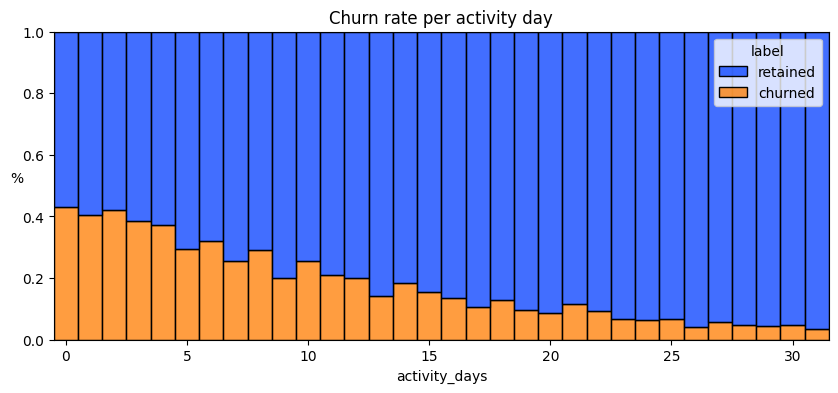

In [25]:
# Histogram for driving_days (total # of days (out of 31) the user drives (at least 1 km) during the month): churn vs retained
plt.figure(figsize=(10,4))

sns.histplot(data=df,
             x='activity_days',
             bins=range(0,32),		# 0 to 31 days in month 	
             hue='label',
             palette='bright',
             multiple='fill',
             discrete=True
            )		

plt.ylabel('%', rotation=0)
plt.title('Churn rate per activity day');

Like the number of days since a user signed up, these plots show a fairly uniform distribution, which would include those “super users.” The median number of days the user opens the app during the month is 16. With the spread going from 0 day to 31.\
Of note: ~250 users barely opened the app while ~250 opened it daily.\
Also of note, this uniform distribution of days does not reveal the skewed sessions plots. There, some people would seem to have had *multiple* sessions per day.    
Not surprisingly, churned users had far fewer activity days.

#### USE OF APP FOR ANY PURPOSE WITH NO MAXIUM
* in last month
* since onboarding

#### Sessions during the month

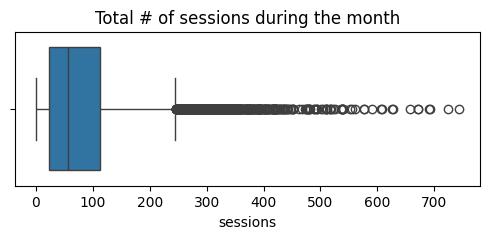

In [26]:
# Box plot for sessions (# of occurrences of a user opening the app during the month (how dedicated to app they are))
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['sessions'])
plt.title('Total # of sessions during the month');

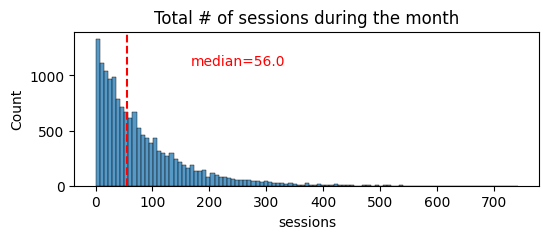

In [27]:
# Histogram for sessions (total # of occurrences of a user opening the app during the month (how dedicated to app they are))
histogrammer('sessions')
plt.title('Total # of sessions during the month');

This plot has a strong positive (right) skew. Dispersion is the extent to which a distribution is stretched or squeezed. This is stretched right and squeezed left. The median number of occurrences of a user opening the app during the month was 56 (~ 2x a day), with it stretching from ~ 20 > 110 (~3.6x a day) and the whiskers starting after about 250.

The outliers have some people opening the app over 700x a month. This amounts of over 23x a day, which seems excessive. This aligns with drives being 19 drives per day as an outlier.

#### % of drives in the month that were of 1km or more

In [28]:
# Out of all opening the app days in the month ('sessions'), what % of those were drives of 1km or more ('drives')?
percent_drives_out_of_sessions = df['drives']/df['sessions']
percent_drives_out_of_sessions.describe()

count    14894.000000
mean         0.860210
std          0.078108
min          0.000000
25%          0.804134
50%          0.821429
75%          0.904762
max          1.000000
dtype: float64

This would seem to align with expectations. The median user opened the app for driving purposes 82% of the time.

#### Total sessions since onboarding

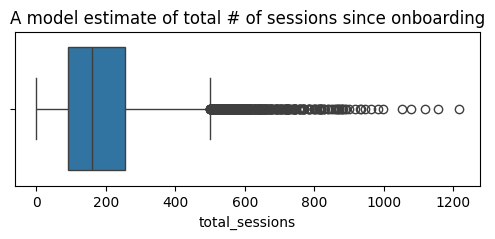

In [29]:
# Box plot for total_sessions (a model estimate of the total # of sessions since a user has onboarded)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['total_sessions'])
plt.title('A model estimate of total # of sessions since onboarding');

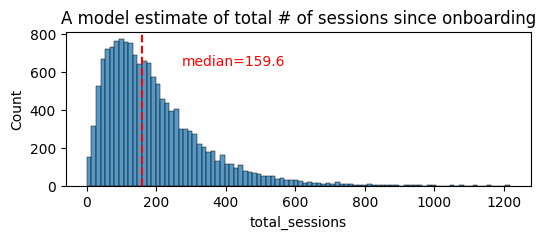

In [30]:
# Histogram for total_sessions (a model estimate of the total # of sessions since a user has onboarded)
histogrammer('total_sessions')
plt.title('A model estimate of total # of sessions since onboarding');

Like the sessions plot, this plot has a positive (right) skew. The median number of occurrences a user opened the app *since onboarding* was 159.6. If the onboarding median is ~4.8 years, this means the app was opened on average 34x a year (or about once a month).
But, the median number of opening the app was 56x (or ~2x a day). A far greater amount than once a month. 

Furthermore, the outliers have some people opening the app over 1200x since onboarding. If in the last month, the median was 56 and total is 159, 56 cannot be indicative of monthly usage. Otherwise, the median user would have only had the app for 3 months. The model estimate seems severely off. 

Finally, the monthly drives per session ratio had a median of 80%, which seems healthy if some people are just checking routes or the app opens accidentally. 

#### % of total session which took place during the month

In [31]:
# Out of ALL a user’s sessions ('total_sessions'), what % took place during the month ('sessions')?
# Create feature percent_sessions_in_last_month
df['percent_sessions_in_month'] = df['sessions'] / df['total_sessions']
df['percent_sessions_in_month'].describe()

count    14999.000000
mean         0.449255
std          0.286919
min          0.000000
25%          0.196221
50%          0.423097
75%          0.687216
max          1.530637
Name: percent_sessions_in_month, dtype: float64

The median user had 42% of their sessions in the last month. This seems incredible.

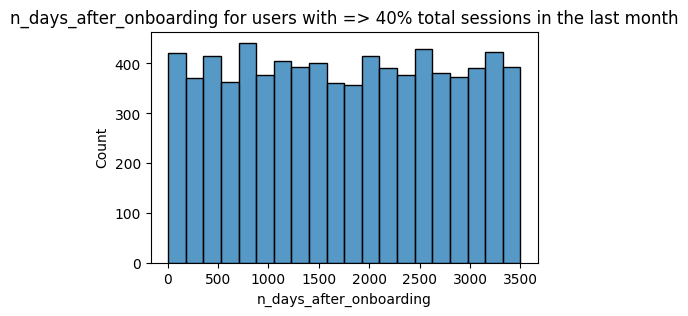

In [32]:
# Histogram of n_days_after_onboarding for users with => 40% total sessions in the last month
data = df.loc[df['percent_sessions_in_month']>=0.4]	 # Conditional
plt.figure(figsize=(5,3))
sns.histplot(x=data['n_days_after_onboarding'])
plt.title('n_days_after_onboarding for users with => 40% total sessions in the last month');

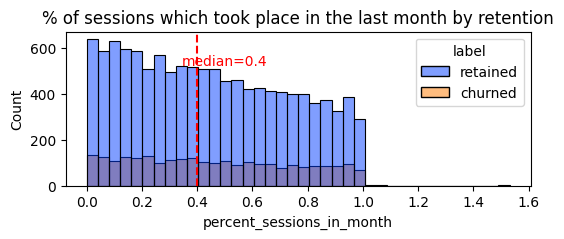

In [33]:
# Histogram for percent_sessions_in_last_month by retention
histogrammer('percent_sessions_in_month',
	          hue=df['label'],
             palette='bright',
	          multiple='layer')
plt.title('% of sessions which took place in the last month by retention');

The range of 'percent_sessions_in_month' is from 0 > 153%. This is fine, if some people churned early. However, the median is 42%, which all seems odd that 2/5s of all use was during this month. If in 4.5 years 40% of the sessions are taking place in during the month, what is going on? In particular since it's a uniform plot for those users. It would seem to be an issue with the model estimate (sessions).

The % of sessions is vastly different for churned and retained users. Retained users vary in the number of sessions whereas churned users are consistent at 175 users for all percentages.

#### Avg # of sessions per day since onboarding
demonstrates the artifice of the feature

In [34]:
# On average how many times has the app been openned per day since onboarding (by model estimate)? 
# Create feature total_sessions_per_day
df['total_sessions_per_day'] = df['total_sessions'] / df['n_days_after_onboarding']
df['total_sessions_per_day'].describe()

count    14999.000000
mean         0.338698
std          1.314333
min          0.000298
25%          0.051037
50%          0.100775
75%          0.216269
max         39.763874
Name: total_sessions_per_day, dtype: float64

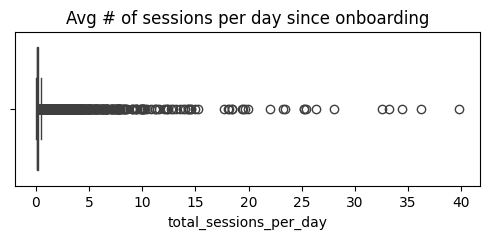

In [35]:
# Box plot for total_sessions_per_day since onboarding (by model estimate)? 
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['total_sessions_per_day'])
plt.title('Avg # of sessions per day since onboarding');

#### USE OF APP FOR DRIVING SPECIFICALLY
* in last month
* since onboarding

#### Driving days (out of 31)

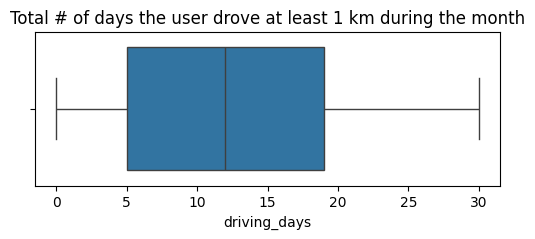

In [36]:
# Box plot for driving_days (total # of days (out of 31) the user drives (at least 1 km) during the month)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['driving_days'])
plt.title('Total # of days the user drove at least 1 km during the month');

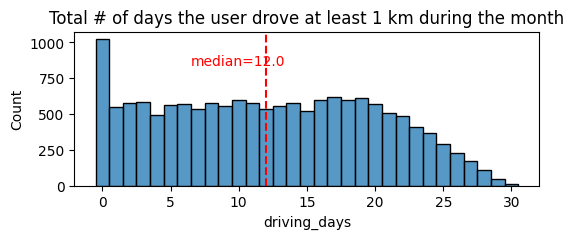

In [37]:
# Histogram for driving_days (total # of days (out of 31) the user drives (at least 1 km) during the month)
histogrammer('driving_days', discrete=True)
plt.title('Total # of days the user drove at least 1 km during the month');

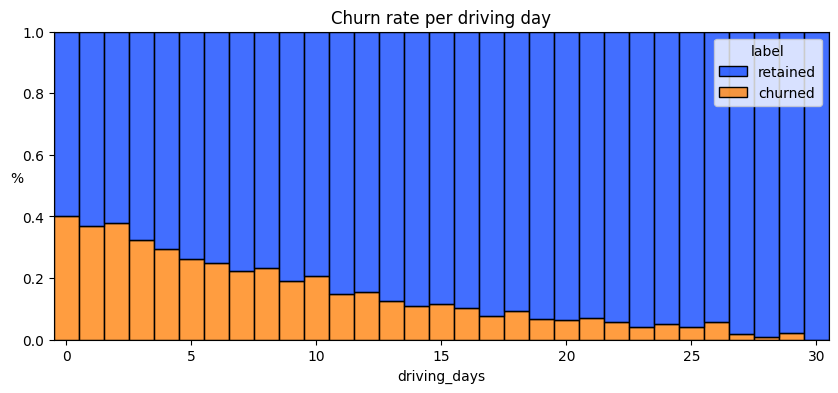

In [38]:
# Histogram for driving_days (total # of days the user drives (at least 1 km) during the month) by retention: churn vs retained
plt.figure(figsize=(10,4))

sns.histplot(data=df,
             x='driving_days',
             bins=range(0,32),
             hue='label',
             palette='bright',
             multiple='fill',
             discrete=True
            )		

plt.ylabel('%', rotation=0)
plt.title('Churn rate per driving day');

Like the number of days since a user onboarded and number of days the user opens the app during the month, these plots show a mostly uniform distribution, which would include/hide those “super users.” The median number of days a user drove at least 1km during the month is 12. With the spread going from 0 day to 31. Also, since it does not align perfectly with activity days, it suggests people may not just use the app for driving.

Of note: ~1000 users never went anywhere while ~250 drove almost daily.

The driving days by retention mirrors the activity days histogram.

#### Driving days vs activity days

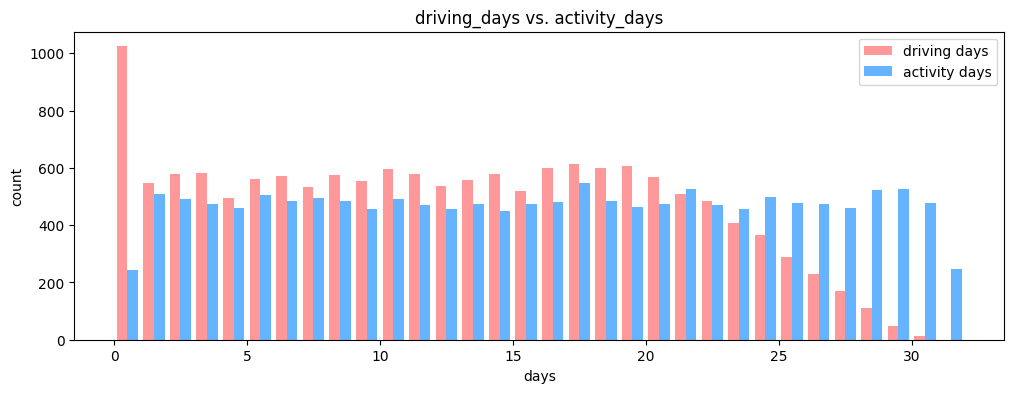

In [39]:
# histogram for driving days vs activity days for all users
plt.figure(figsize=(12,4))
label=['driving days', 'activity days']

plt.hist([df['driving_days'], df['activity_days']],
         bins=range(0,33),
         label=label, color=['#ff9999', '#66b3ff'])

plt.xlabel('days')
plt.ylabel('count')

plt.legend()
plt.title('driving_days vs. activity_days');

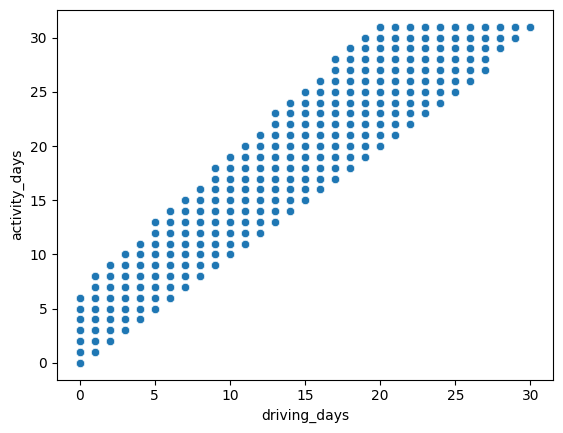

In [40]:
# Create scatterplot of driving days vs activity days
sns.scatterplot(data=df, x='driving_days', y='activity_days');

`activity_days`: total # of days the user opened the app during the month
* 0 -> 31; Median: 16

`driving_days`: total # of days the user drives (at least 1 km) during the month
* 0 -> 31; Median: 12

The *histogram* shows that ~1000 people never went anywhere, but of those ~250 opened the app at least 1 day during the month. On the other hand, many people regularly opened the app, but did not go anywhere. Perhaps simply checking directions or traffic times. It is strange that ~600 people were active every day of the month, even though the days they drove tapers off after 20 days.

The *scatter plot* illustrates the relationship between use of the app and drives with 30 drives aligning with 30 days of activity vs 6 activity days, yet no driving. 

#### Drives in last month

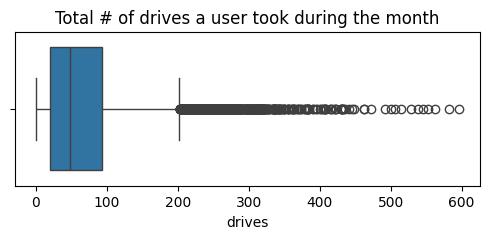

In [41]:
# Box plot for # of drives (total # of occurrences of a user driving at least 1 km last month) no limit
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['drives'])
plt.title('Total # of drives a user took during the month');

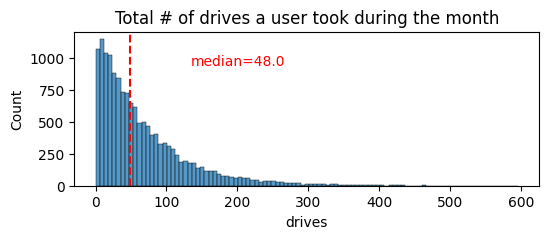

In [42]:
# Histogram for # of drives (total # of occurrences of a user driving at least 1 km last month) no limit
histogrammer('drives')
plt.title('Total # of drives a user took during the month');

Similar to the sessions data, this plot has a positive skew. The median is 48 drives during the month, which would come to ~ 1 1/2 drives per day or 2 per day on weekdays, & 2 on the weekends.\
Some drivers seem to have been “super drivers” with over 450 drives (~15 per day) for the month.

#### How many drives on average were taken *per day* in the month?
* create new df with 'driving_days', 'drives', 'label'
* create new feature in new df 'avg_drives_per_day_in_the_month'

In [43]:
avg_drives_per_day = df[['driving_days', 'drives', 'label']].reset_index(drop=True)
avg_drives_per_day.head()

,driving_days,drives,label
0,19,226,retained
1,11,107,retained
2,8,95,retained
3,3,40,retained
4,18,68,retained


In [44]:
# How many drives on average were taken per day in the month? 
avg_drives_per_day['avg_drives_per_day_in_the_month'] = avg_drives_per_day['drives'] / avg_drives_per_day['driving_days']
avg_drives_per_day.head()

,driving_days,drives,label,avg_drives_per_day_in_the_month
0,19,226,retained,11.894737
1,11,107,retained,9.727273
2,8,95,retained,11.875000
3,3,40,retained,13.333333
4,18,68,retained,3.777778


In [45]:
avg_drives_per_day['avg_drives_per_day_in_the_month'].describe()

/usr/local/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499200e+04
mean              inf
std               NaN
min      0.000000e+00
25%      1.800000e+00
50%      4.666667e+00
75%      1.216667e+01
max               inf
Name: avg_drives_per_day_in_the_month, dtype: float64

In [46]:
# Convert infinite values to zero
avg_drives_per_day.loc[avg_drives_per_day['avg_drives_per_day_in_the_month']==np.inf, 'avg_drives_per_day_in_the_month'] = 0
avg_drives_per_day['avg_drives_per_day_in_the_month'].describe()

count    14992.000000
mean         9.387368
std         19.826097
min          0.000000
25%          1.250000
50%          3.666667
75%          9.000000
max        395.000000
Name: avg_drives_per_day_in_the_month, dtype: float64

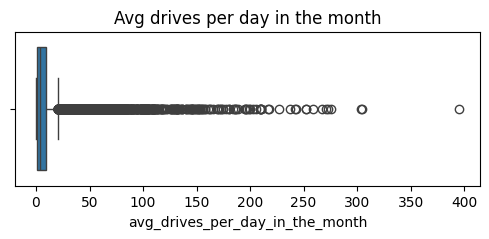

In [47]:
# Box plot for 
plt.figure(figsize=(6,2))
box = sns.boxplot(x=avg_drives_per_day['avg_drives_per_day_in_the_month'])
plt.title('Avg drives per day in the month');

In [48]:
# Group by `label`, calculate the median, and isolate for km per drive
avg_drives_per_day_by_user = avg_drives_per_day.groupby('label').median(numeric_only=True)[['avg_drives_per_day_in_the_month']]
avg_drives_per_day_by_user

,avg_drives_per_day_in_the_month
label,
churned,5.500000
retained,3.470588


Result    
The average # of drives taken per day in the month ranged from 0 to 395. 395 drives per day would seem to be an impossibility. The median of avg drives however is a much more reasonable 3.66. 

On average, the median drives taken per day differs between churned and retained drivers, with churned drivers taking 2 more drives per day during the month.
* Perhaps pull out these observations with impossible driving rates, to better see what's going on.

#### Total kilometers driven during the month

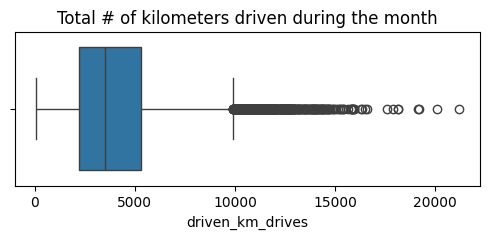

In [49]:
# Box plot for driven_km_drives (total kilometers driven during the month)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['driven_km_drives'])
plt.title('Total # of kilometers driven during the month');

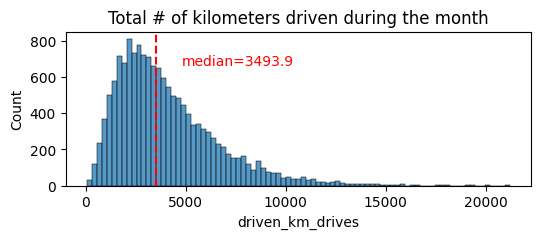

In [50]:
# Histogram for driven_km_drives (total kilometers driven during the month)
histogrammer('driven_km_drives')
plt.title('Total # of kilometers driven during the month');

Again, this plot has a positive (right) skew. The median number of total kilometers driven during the month was ~ 3,495kms (~2172 miles or 70 miles per day).  
But the outliers have some people driving over 25000 kms last month, which probably aligns with the 395 average drives per day. *Is this a machine?

#### Actual avg kilometers driven per day during the month

In [51]:
# How many kilometers ('driven_km_drives') on average were driven per day in the month ('driving_days')? 
# Create feature kms_driven_per_day_during_the_month
df['kms_driven_per_day_during_the_month'] = df['driven_km_drives'] / df['driving_days']
df['kms_driven_per_day_during_the_month'].describe()

/usr/local/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      3.022063e+00
25%      1.672804e+02
50%      3.231459e+02
75%      7.579257e+02
max               inf
Name: kms_driven_per_day_during_the_month, dtype: float64

In [52]:
# Convert infinite values to zero
df.loc[df['kms_driven_per_day_during_the_month']==np.inf, 'kms_driven_per_day_during_the_month'] = 0
df['kms_driven_per_day_during_the_month'].describe()

count    14999.000000
mean       578.963113
std       1030.094384
min          0.000000
25%        136.238895
50%        272.889272
75%        558.686918
max      15420.234110
Name: kms_driven_per_day_during_the_month, dtype: float64

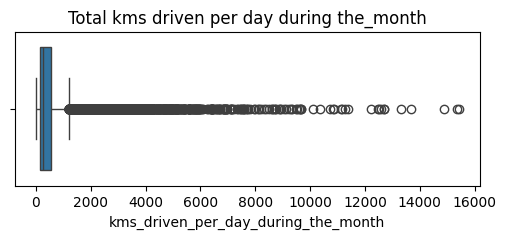

In [53]:
# Create box plot kms_driven_per_driving_day_during_the_month
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['kms_driven_per_day_during_the_month'])
plt.title('Total kms driven per day during the_month');

The rough median avg of kilometers driven per day during the month (~ 70 miles) does not align with the actual average of the median driver at 273 (~ 170 miles). This is a lot. The maximum 15420 (~ 9581 miles) isn't even possible.

#### Avg kilometers driven per day during the month by retention

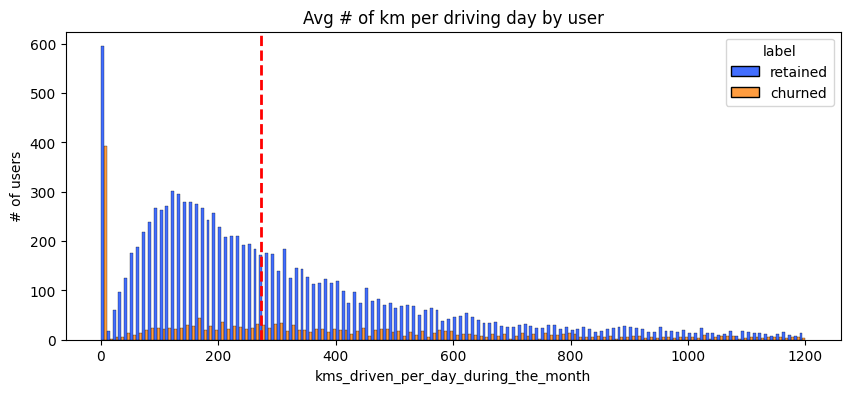

In [54]:
# Histogram for avg kms_driven_per_day_during_the_month by retention
plt.figure(figsize=(10,4))

sns.histplot(data=df,
             x='kms_driven_per_day_during_the_month',
             bins=range(0, 1201, 10),
             hue='label',
             palette='bright',
             multiple='dodge'
             )

# Calculate the median
median_value = np.median(df['kms_driven_per_day_during_the_month'])

# Add a vertical line for the median
plt.axvline(median_value, color='red', linestyle='dashed', linewidth=2)

plt.ylabel('# of users')
plt.title('Avg # of km per driving day by user')
plt.show();

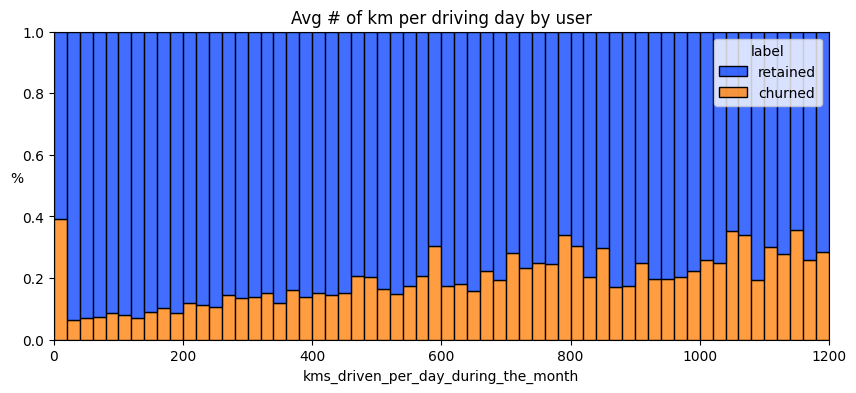

In [55]:
# Histogram for % of avg kms_driven_per_day_during_the_month by retention
plt.figure(figsize=(10,4))

sns.histplot(data=df,
             x='kms_driven_per_day_during_the_month',
             bins=range(0,1201,20),
             hue='label',
             palette='bright',
             multiple='fill'
            )

plt.ylabel('%', rotation=0)
plt.title('Avg # of km per driving day by user');

The histograms illustrate that churned users drove more kilometers than retained users.

#### Median kilometers driven per day on average during the month by retention

In [56]:
# Calculate median kms_driven_per_day_during_the_month by user type (groupby)
kms_driven_per_day_during_the_month = df.groupby('label').median(numeric_only=True)[['kms_driven_per_day_during_the_month']]
kms_driven_per_day_during_the_month

,kms_driven_per_day_during_the_month
label,
churned,407.597934
retained,256.056187


On average, the median churned drivers drove significantly more than retained drivers per day during the month.

#### Avg kilometers driven per drive in month

In [57]:
# How many kilometers on average were driven per drive in the month? 
# Create feature`km_per_drive` feature 
df['km_per_drive'] = df['driven_km_drives'] / df['drives']
df['km_per_drive'].describe()

/usr/local/lib/python3.11/site-packages/pandas/core/nanops.py:1010: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


count    1.499900e+04
mean              inf
std               NaN
min      1.008775e+00
25%      3.323065e+01
50%      7.488006e+01
75%      1.854667e+02
max               inf
Name: km_per_drive, dtype: float64

In [58]:
# Convert infinite values to zero
df.loc[df['km_per_drive']==np.inf, 'km_per_drive'] = 0
df['km_per_drive'].describe()

count    14999.000000
mean       232.817946
std        620.622351
min          0.000000
25%         32.424301
50%         72.854343
75%        179.347527
max      15777.426560
Name: km_per_drive, dtype: float64

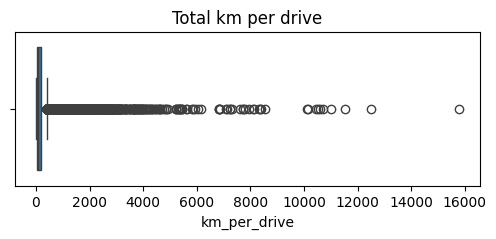

In [59]:
# Create box plot kms_driven_per_driving_day_during_the_month
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['km_per_drive'])
plt.title('Total km per drive');

Again, these are similar numbers to the kilometers ('driven_km_drives') on average were driven per day in the month ('driving_days')? 

#### Median kilometers driven per drive in month by retention

In [60]:
# Group by `label`, calculate the median, and isolate for km per drive
km_per_drive = df.groupby('label').median(numeric_only=True)[['km_per_drive']]
km_per_drive

,km_per_drive
label,
churned,72.771939
retained,73.006576


This is interesting. Per drive on avg the median churned and retained driver drove about the same distance; however, per day, 
median churned drivers drove on avg 150 more kilometers. However, the math on this is difficult to square. If each drive is ~ 44 miles, but the total miles per day is 70. However, if one considers that driving days tapers off at about the 20 day mark, the sweet spot is at about 26 days of driving for the month, which would come to ~ 84 miles driven per day.

#### Total duration driven in minutes during the month

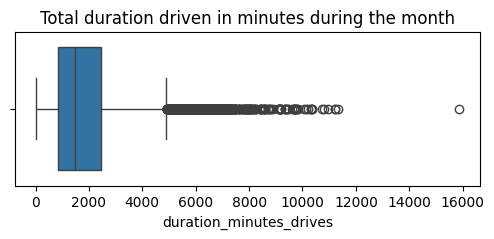

In [61]:
# Box plot for duration_minutes_drives (total duration driven in minutes during the month)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['duration_minutes_drives'])
plt.title('Total duration driven in minutes during the month');

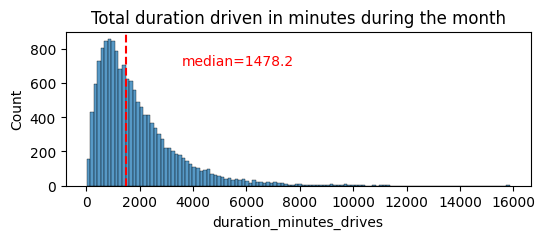

In [62]:
# Histogram for duration_minutes_drives (total duration driven in minutes during the month)
histogrammer('duration_minutes_drives')
plt.title('Total duration driven in minutes during the month');

Again, this plot has a positive (right) skew. The median number of total minutes spent driving driven during the month was ~ 1478 (~ 25 hrs). But the outliers have some people driving over 11,500 (~ 192 hrs or 8 hrs a day). 

This suggests that drivers are driving less that 1hr a day. This aligns with the driving days data, which says users did not drive every day – so the minutes during the month should really be averaged with driving days – not 31 days, but more like 28.

#### Avg rate of kilometers driven per hour in month

In [63]:
# How many kilometers ('driven_km_drives') on average were driven per hour in the month ('duration_minutes_drives')? 
# Create feature km_per_hour
df['km_per_hour'] = df['driven_km_drives'] / (df['duration_minutes_drives'] / 60)
df['km_per_hour'].describe()

count    14999.000000
mean       190.394608
std        334.674026
min         72.013095
25%         90.706222
50%        122.382022
75%        193.130119
max      23642.920871
Name: km_per_hour, dtype: float64

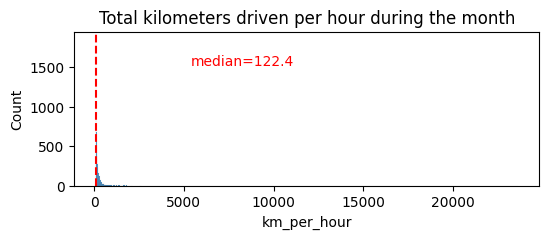

In [64]:
histogrammer('km_per_hour')
plt.title('Total kilometers driven per hour during the month');

23643 kilometers per hour is not possible.

#### Median rate of kilometers driven per hour in month by retention

In [65]:
# Group by `label`, calculate the median, and isolate for km per drive
km_per_hour = df.groupby('label').median(numeric_only=True)[['km_per_hour']]
km_per_hour

,km_per_hour
label,
churned,119.608930
retained,122.953052


#### Churned vs retained drivers   
On average, the median churned driver 
* drove ~ 150 more kms per day (~ 93 miles) than retained drivers during the month
* took more than 2 more drives per day
  * each drive they took was on average the same distance as the retained drivers (~ 73kms or 43.5 miles)
  * and each drove at the same rate (~ 120km per hr or ~ 75 miles)

This suggests that churned drivers and "super drivers" may intersect as professional (delivery?) drivers.

#### FAVORITE PLACES

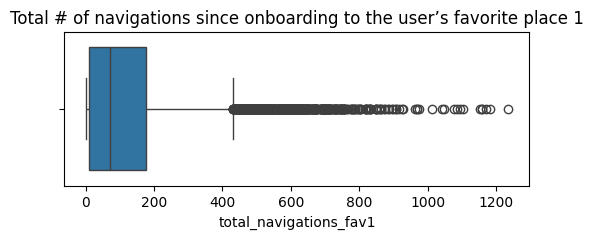

In [66]:
# Box plot of total_navigations_fav2 (total # of navigations since onboarding to the user’s favorite place 1)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['total_navigations_fav1'])
plt.title('Total # of navigations since onboarding to the user’s favorite place 1');

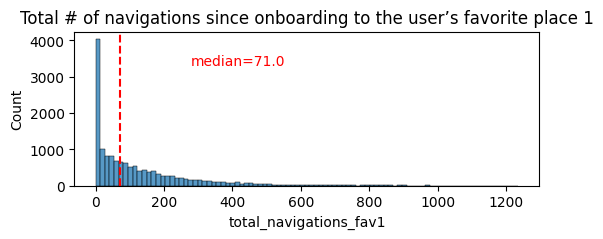

In [67]:
# Histogram of total_navigations_fav1: total # of navigations since onboarding to the user’s favorite place 1
histogrammer('total_navigations_fav1')
plt.title('Total # of navigations since onboarding to the user’s favorite place 1');

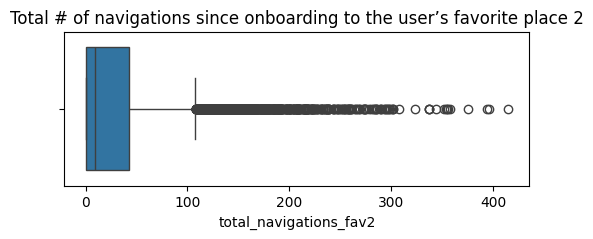

In [68]:
# Box plot of total_navigations_fav2 (total # of navigations since onboarding to the user’s favorite place 2)
plt.figure(figsize=(6,2))
box = sns.boxplot(x=df['total_navigations_fav2'])
plt.title('Total # of navigations since onboarding to the user’s favorite place 2');

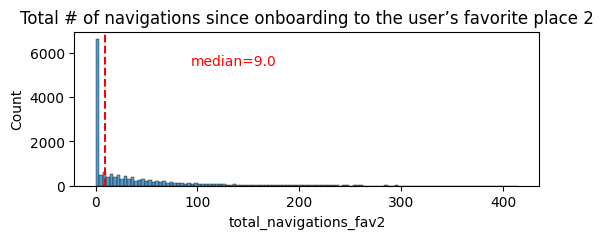

In [69]:
# Histogram of total_navigations_fav2: total # of navigations since onboarding to the user’s favorite place 1
histogrammer('total_navigations_fav2')
plt.title('Total # of navigations since onboarding to the user’s favorite place 2');

Finally, of the ~15000 users of the app, 4,000 have never navigated to any favorite place    
an additional ~2500 have never navigated to a 2nd favorite place   
On the other hand, the majority of users have navigated at least 100 times to their favorite places, with the outlier group going 1000 times. This latter group is not unreasonable if a user has had the app for at least 4 years and uses it for commuting.     
Finally, although the fav place 1 histogram has a positive skew with 71 times being the median, this is misleading. If the outliers are removed, the skew is far less extreme, with the plot resulting in a more uniform distribution.

In [70]:
# Create new csv file for transformed df
df.to_csv('WAZE_dataset_transformed.csv', index=False)
df = pd.read_csv('WAZE_dataset_transformed.csv')
df.head()

,label,sessions,drives,total_sessions,n_days_after_onboarding,total_navigations_fav1,total_navigations_fav2,driven_km_drives,duration_minutes_drives,activity_days,driving_days,device,percent_sessions_in_month,total_sessions_per_day,kms_driven_per_day_during_the_month,km_per_drive,km_per_hour
0,retained,283,226,296.748273,2276,208,0,2628.845068,1985.775061,28,19,Android,0.953670,0.130381,138.360267,11.632058,79.430298
1,retained,133,107,326.896596,1225,19,64,13715.920550,3160.472914,13,11,iPhone,0.406856,0.266854,1246.901868,128.186173,260.389902
2,retained,114,95,135.522926,2651,0,0,3059.148818,1610.735904,14,8,Android,0.841186,0.051121,382.393602,32.201567,113.953460
3,retained,49,40,67.589221,15,322,7,913.591123,587.196542,7,3,iPhone,0.724968,4.505948,304.530374,22.839778,93.351141
4,retained,84,68,168.247020,1562,166,5,3950.202008,1219.555924,27,18,Android,0.499266,0.107713,219.455667,58.091206,194.342970


In [71]:
df.columns

Index(['label', 'sessions', 'drives', 'total_sessions',
       'n_days_after_onboarding', 'total_navigations_fav1',
       'total_navigations_fav2', 'driven_km_drives', 'duration_minutes_drives',
       'activity_days', 'driving_days', 'device', 'percent_sessions_in_month',
       'total_sessions_per_day', 'kms_driven_per_day_during_the_month',
       'km_per_drive', 'km_per_hour'],
      dtype='object')

In [72]:
df.shape

(14999, 17)

Data transformations stored in 'waze_dataset_transformed.csv'
* Removed ID column
* Added columns
  * `percent_sessions_in_month`
  * `total_sessions_per_day`
  * `kms_driven_per_day_during_the_month`
  * `km_per_drive`
  * `km_per_hour`

## Preliminary conclusions (see report for final summary)
There is a uniform distribution in the number of days since a user on boarded; roughly 600 users for any given length of time. The median number of days since a user **onboarded** is 1741 (~ 4.8 years). The longest a user has been on the app is ~ 3,500 days (~9.5 years).

*Use of app for any reason*\
For the “last” month, here is also a fairly uniform distribution of daily use (`activity_days`). Roughly 550 users opened the app a given number of days in the month. This is confirmed by the median number of days the user opens the app during the month at 16. With the spread going from 0 day to 31. ~250 users barely opened the app while ~250 opened it daily.

This said, the number of `sessions` over the month varies dramatically. The median number of occurrences of a user opening the app during the month was 56 (~ 2x a day), with it stretching from ~ 20 > 110 (~3.6x a day). 
The outliers have some people opening the app over 700x a month. This amounts of over 23x a day, which seems excessive. **This aligns with drives being 19 drives per day as an outlier**.

This monthly usage does not align with the usage since onboarding. If the median number of occurrences a user opened the app *since onboarding* was 159.6 (`total_sessions`) and the onboarding median is ~4.8 years, this means the app was opened on average 34x a year (or about once a month) – not twice a month as is the case in the variable ‘sessions.’ The outliers for this feature are less informative. These have some people opening the app over 1200x since onboarding, which is fine if the maximum years since onboarding is ~9.5.

*App for driving*\
As for driving habits the median number of days a user drove at least 1km during the month is 12 (`driving_days`), however this is not entirely informative. As with activity days and number of days since onboarding, the histogram shows a fairly uniform distribution (up until ~20 days out of the month) with ~500 users driving at least 1km per day. At the 20-day mark, number of days a user drove at least 1km during the month tapers off to very few. This aligns with commuter driving habits (20 days of the month being work days). There were also about 1000 users who never drove anywhere.
 
`Driving_days` and `activity_days` do not perfectly align, suggesting that users use the app for purposes other than in time navigation. The median number of activity_days was 16 and the median number of driving_days was 12.
The histogram shows that ~1000 people never went anywhere, but of those ~250 drove at least 1 day during the month. On the other hand, many people regularly opened the app, but did not go anywhere. Perhaps simply checking directions or traffic times.
The scatter plot illustrates the relationship between use of the app and drives with 30 drives aligning with 30 days of activity vs 6 activity days, yet no driving. 

The median *total* number of `drives`a user drove during the month was 48. This also aligns with commuter driving habits. It could come to ~ 1 1/2 drives per day or 2 per day on weekdays, & 2 on the weekends. With this said, the swing between number of drives is large. There is the group of 1000 users who never drove and **there are the “super drivers”** with over between 200-596 drives (~~15 per day).
The median number of total kilometers driven during the month (`driven_km_drives`) was ~ 3,495kms (~2172 miles or 70 miles per day). This aligns with the possibility that commuters are opening the app 2x a day if they drove 35miles in each direction. However, again the **“super drivers”** appear in the outliers where some users are driving between 10000>25000 kms during this month. This far end works out to 424.5 miles per day *on average*. 

The median number of total minutes spent driving during the month (`duration_minutes_drives`) was 1478 or 25 hrs. This suggests that drivers are driving less that 1hr a day. This does not align with the driving days data, which says users did not drive every day – so the minutes during the month should really be averaged with driving days – not 31 days, but more like 22 > 26. This would work out to more like  84 > 94 miles per day. 

However, again the **“super drivers”** appear in the outliers where some users are driving for over 11,500 (~ 192 hrs or 8 hrs a day). 
Finally, of the ~15000 users of the app, 4,000 have never navigated to any favorite place and an additional ~2500 have never navigated to a 2nd favorite place. On the other hand, the majority of users have navigated at least 100 times to their favorite places, with the outlier group going 1000 times. This latter group is not unreasonable if a user has had the app for at least 4 years and uses it for commuting.   
And, although the histogram has a positive skew with 71 times being the median, this is misleading. If the outliers are removed, the skew is far less extreme, with the plot resulting in a more uniform distribution.

**All users summary**\
Based on the medians of the variables, the majority of users would seem to be commuters who drive ~90 miles a day, or about 2hrs, 20 days a week. There are seem to be user whose commutes would not be as long and drive to new places on the weekends. Furthermore, there are users who do not use the app for driving, but maybe for simple navigation.

Statistical analysis also uncovered drivers who could be called super drivers who drive for very long and very far distances. These could be professional drivers.

Finally, the variable `total_sessions`, which is a model estimate of total # of sessions since onboarding, does not align with any of the variables. The median number of occurrences (`total_sessions`) a user opened the app since onboarding was 159.6. This simply does not align with the median number of opening the app at 56x.

**Churn initial summary**    
The data set is unbalanced with only 18% of users churning and 82% remaining (`label`). The ratio of remaining and churning iPhone users to Android users is the same regardless of category. ~65% of retained users and churned users use iPhones and ~35% of retained users and churned users use Androids (`device`). (IMAGE)

Examining the median churned user, churned users used the app more for driving while they had it. Although, they had almost an even number of drives, sessions, and total_sessions, churned users drove ~200 kms more and for ~2.5 hours more. They also took more advantage of the total_navigations_fav1 and total_navigations_fav2 features. They did this in less than ½ the number of activity_days (8/17) and driving_days (6/14) than retained users. The histogram (IMAGE), reveals that that number of active days during the month maintains an ~40/60% churned users to retained users at about 5 days, this gradually tapers off until about the 22 days mark. At this point, users who churned only make up about 3% of those users who had 23-31 activity days. As for driving days, (IMAGE) this tapering off happens after about 3 days. Up until 3 days, there is again a ~40/60% churned users to retained users ratio. By the 26 day mark, users who churned are no longer driving with the app (1%).

So, on average, the median churned drivers drove ~ 150 more kms per day than retained drivers during the month, and took more than 2 more drives per day, each drive they took was on average the same distance as the retained drivers (~ 73kms or 43.5 miles) and took the same duration of time (~ 120km per hr). This suggests that churned drivers and "super drivers" may intersect as professional (delivery?) drivers.

Finally, the median number of days a churned user had the app was about 3.5 years, whereas a retained user had a median tenure of 5 years.

Examining the median churned user:
* churned users used the app more for driving while they had it
* they had almost an even number of drives, sessions, and total_sessions
* churned users drove ~200 kms more
* and for ~2.5 hours more
* they also took more advantage of the total_navigations_fav1 and total_navigations_fav2 features
* they had less than ½ the number of activity_days (8/17) and driving_days (6/14) than retained users
* The histogram reveals that that number of active days during the month maintains an ~40/60% churned users to retained users at about 5 days, this gradually tapers off until about the 22 days mark. At this point, users who churned only make up about 3% of those users who had 23-31 activity days.
* As for driving days this tapering off happens after about 3 days. Up until 3 days, there is again a ~40/60% churned users to retained users ratio. By the 26 day mark, users who churned are no longer driving with the app (1%). 

On average:
* the median churned drivers drove ~ 150 more kms per day than retained drivers during the month
* took more than 2 more drives per day
* each drive they took was on average the same distance as the retained drivers (~ 73kms or 43.5 miles)
* they took the same duration of time (~ 120km per hr).
* This suggests that churned drivers and "super drivers" may intersect as professional (delivery?) drivers.
* Finally, the median number of days a churned user had the app was about 3.5 years, whereas a retained user had a median tenure of 5 years.

**The curious case of the super user**      
The data set revealed a “super user” category. The usage statistics of these users, where identifiable, were in the 90th percentile of usage. On the maximum end, in the last month, they opened the app 23x a day, had 19 drives of 1km or more per day, drove over 400 miles a day, and drove for over 8 hrs a day. These drivers are most likely professionals who may intersect with the churned users, since the churned users tended to use the app more than the retained users.

## Further steps/considerations
* Create a professional driver feature to address the outlying “super users”
* Perform a hypothesis test
* Perform a logistical regression

Also, recommended
* A revisit of the EDA
* After a request a true total sessions accounting
* And a request for a true total drives taken for the entirety of having the app


#### See WAZE II for binomial regression model
#### WAZE III for tree-based model
#### Appendix for hypothesis testing